   Year  Month  Rainfall amount (millimetres)
0  2024      1                           60.8
1  2024      2                            4.6
2  2024      3                           14.6
3  2024      4                           32.2
4  2024      5                           40.8
5  2024      6                           26.6
6  2024      7                           54.0
7  2024      8                           26.0
   Year  Month  Rainfall amount (millimetres)
7  2024      8                           26.0


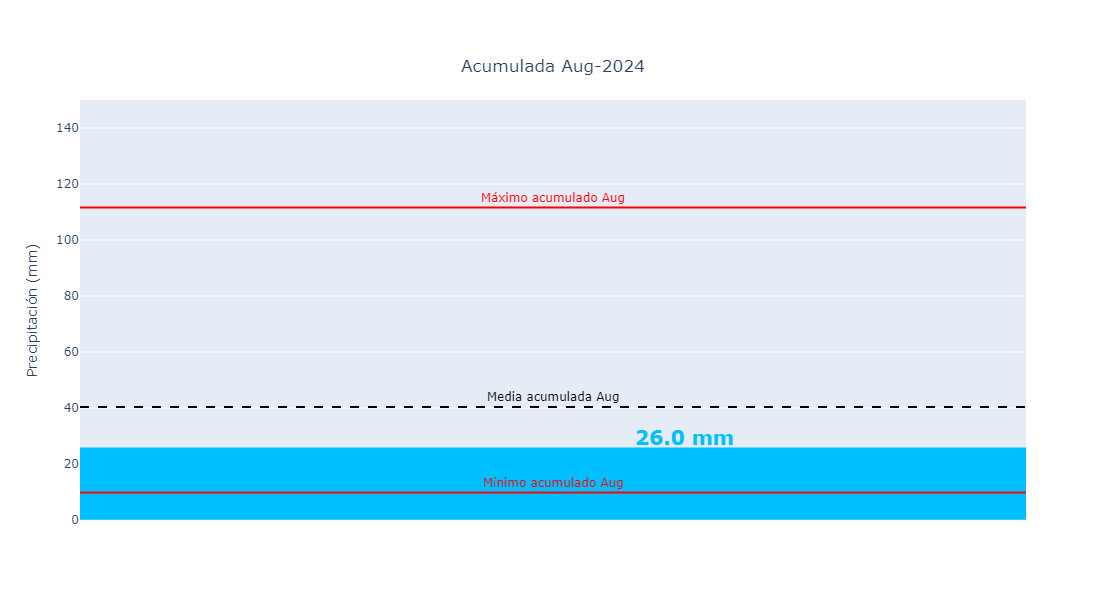

In [6]:
import pandas as pd

# Load the data from the uploaded file
file_path = '/home/571/jy6645/ohw/data/rain2005-2023.csv'
rain_data = pd.read_csv(file_path)

# Filter data for August of each year
august_data = rain_data[(rain_data['Month'] == 8)]

# Calculate cumulative rainfall for each year in August
august_cumulative = august_data.groupby('Year')['Rainfall amount (millimetres)'].sum()

# Calculate the maximum, minimum, and average cumulative rainfall for August
max_august_rainfall = august_cumulative.max()
min_august_rainfall = august_cumulative.min()
avg_august_rainfall = august_cumulative.mean()

max_august_rainfall, min_august_rainfall, avg_august_rainfall

######################################################

# Load the data from the CSV file
file_path = '/home/571/jy6645/ohw/data/rain2024.csv'  # Replace with your actual file path
rain_data = pd.read_csv(file_path)

# Group by Year and Month to calculate the cumulative sum of rainfall for each month
monthly_cumulative_rainfall = rain_data.groupby(['Year', 'Month'])['Rainfall amount (millimetres)'].sum().reset_index()

# Display the cumulative monthly rainfall
print(monthly_cumulative_rainfall)


# Filter the data for August only
august_rainfall = monthly_cumulative_rainfall[monthly_cumulative_rainfall['Month'] == 8]
# Display the August rainfall
print(august_rainfall)

# Filter the data for August only and extract the rainfall values
august_rainfall_values = list(monthly_cumulative_rainfall[monthly_cumulative_rainfall['Month'] == 8]['Rainfall amount (millimetres)'])[0]

# Display the August rainfall values
#print(august_rainfall_values.values)

###################
###############
import plotly.graph_objects as go

# Example data
current_rainfall = august_rainfall_values
#max_august_rainfall = 111.6
#min_august_rainfall = 9.8
#avg_august_rainfall = 40.37

# Create a bar chart using Plotly
fig = go.Figure()

# Add bar for current rainfall
fig.add_trace(go.Bar(
    x=['Acumulada Aug-2024'],
    y=[current_rainfall],
    marker_color='#00BFFF',
#    text=[f'{current_rainfall} mm'],
#    texttemplate='<b style="color:#00BFFF; font-size:20px;">%{text}</b>',  # Set text color and size
#    textposition='outside',
#    width=1  # Set width to fill the axis
))

# Manually add an annotation to adjust text position
fig.add_annotation(
    x=0,  # x-axis position (relative to the bar)
    y=current_rainfall,  # y-axis position (at the top of the bar)
    text=f'<b style="color:#00BFFF; font-size:20px;">{current_rainfall} mm</b>',
    showarrow=False,
    xanchor='left',  # Anchor the text to the left side
    xshift=80, # Move text to the right by 20 pixels
    yshift=10  # Move text up by 10 pixels
)

# Add lines for max, min, and average rainfall
fig.add_shape(type="line",
              x0=-0.2, y0=max_august_rainfall, x1=1.2, y1=max_august_rainfall,
              line=dict(color="red", width=2),
              name="Máximo acumulado Aug")

fig.add_shape(type="line",
              x0=-0.2, y0=min_august_rainfall, x1=1.2, y1=min_august_rainfall,
              line=dict(color="red", width=2),
              name="Mínimo acumulado Aug")

fig.add_shape(type="line",
              x0=-0.2, y0=avg_august_rainfall, x1=1.2, y1=avg_august_rainfall,
              line=dict(color="black", width=2, dash="dash"),
              name="Media acumulada Aug")

# Add annotations for the lines
fig.add_annotation(x=0, y=max_august_rainfall, text="Máximo acumulado Aug", showarrow=False,
                   yshift=10, font=dict(color="red", size=12))

fig.add_annotation(x=0, y=min_august_rainfall, text="Mínimo acumulado Aug", showarrow=False,
                   yshift=10, font=dict(color="red", size=12))

fig.add_annotation(x=0, y=avg_august_rainfall, text="Media acumulada Aug", showarrow=False,
                   yshift=10, font=dict(color="black", size=12))

# Update layout
fig.update_layout(
    title={
        'text': 'Acumulada Aug-2024',
        'y': 0.9,  # Vertical alignment
        'x': 0.5,  # Horizontal alignment
        'xanchor': 'center',
        'yanchor': 'top'
    },
    yaxis_title='Precipitación (mm)',
    yaxis_range=[0, 150],
    showlegend=False,
    width=900,
    height=600,
    xaxis=dict(
        showticklabels=False,  # Hide the x-axis label
        range=[-0.2, 0.2],  # Adjusting the range to remove gaps
    ),
    bargap=0  # Set to 0 to remove gap between bar and axis
)

# Save the figure as an HTML file
fig.write_html('Acumulada_Aug-2024_plot.html')

# 显示图表
fig.show()


In [7]:
fig.write_json("Acumulada_Aug-2024_plot.json")